In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_file = '../data/config/ROMS/roms_avg01_2009_datetime.nc'
mesh_file = '/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/ROMS/roms_grd2_1500mVT1.nc'
sigma_file = '../data/config/ROMS/sigma2depth_parent.nc'

In [3]:
coord = xr.open_dataset(mesh_file)

In [4]:
lon_u = coord.lon_u
lat_u = coord.lat_u
lon_v = coord.lon_v
lat_v = coord.lat_v
lon_rho = coord.lon_rho
lat_rho = coord.lat_rho
lon_psi = coord.lon_psi
lat_psi = coord.lat_psi
print(lon_u.shape)
print(lon_v.shape)
print(lon_rho.shape)
print(lon_psi.shape)

(258, 237)
(257, 238)
(258, 238)
(257, 237)


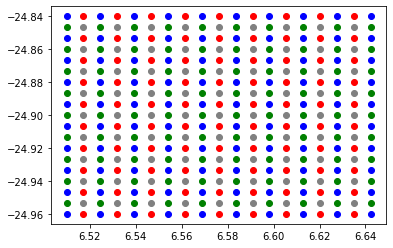

In [5]:
plt.scatter(lon_u[:10,:9], lat_u[:10,:9], color='red')
plt.scatter(lon_v[:9,:10], lat_v[:9,:10], color='green')
plt.scatter(lon_rho[:10,:10], lat_rho[:10,:10], color='blue')
plt.scatter(lon_psi[:9,:9], lat_psi[:9,:9], color='gray')

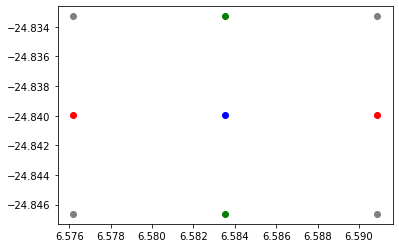

In [6]:
i = 4
j = 8
plt.scatter(lon_u[j+1,i], lat_u[j+1, i], color='red')
plt.scatter(lon_u[j+1,i+1], lat_u[j+1, i+1], color='red')
plt.scatter(lon_v[j, i+1], lat_v[j, i+1], color='green')
plt.scatter(lon_v[j+1, i+1], lat_v[j+1, i+1], color='green')
plt.scatter(lon_rho[j+1, i+1], lat_rho[j+1, i+1], color='blue')
plt.scatter(lon_psi[j:j+2,i:i+2], lat_psi[j:j+2,i:i+2], color='gray')

In [7]:
ds = xr.open_dataset(data_file)
sigma = xr.open_dataset(sigma_file)

In [8]:
print(ds.u.shape)
print(ds.v.shape)
print(ds.w.shape)
print(sigma.hs.shape)

(60, 32, 258, 237)
(60, 32, 257, 238)
(60, 32, 258, 238)
(32, 258, 238)


In [9]:
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4_3D

fatal: not a git repository (or any of the parent directories): .git


In [10]:
filenames = {'U': {'lon': mesh_file, 'lat': mesh_file, 'depth': sigma_file, 'data': data_file},
             'V': {'lon': mesh_file, 'lat': mesh_file, 'depth': sigma_file, 'data': data_file},
             'W': {'lon': mesh_file, 'lat': mesh_file, 'depth': sigma_file, 'data': data_file},
            }
variables = {'U': 'u',
             'V': 'v',
             'W': 'w'}
dimensions = {'lon': 'lon_psi', 'lat': 'lat_psi', 'depth': 'hs', 'time': 'time'}
fieldset = FieldSet.from_c_grid_dataset(filenames, variables, dimensions)

In [11]:
print(type(fieldset.U.grid))
assert fieldset.U.grid is fieldset.V.grid
assert fieldset.U.grid is fieldset.W.grid

<class 'parcels.grid.RectilinearSGrid'>


In [12]:
fieldset.computeTimeChunk(time=fieldset.U.grid.time[0], dt=1)
print(fieldset.U.data.shape)
print(fieldset.U.grid.lon.shape)
print(fieldset.U.grid.lat.shape)
print(fieldset.U.grid.depth.shape)

(2, 32, 257, 237)
(237,)
(257,)
(32, 257, 237)


In [13]:
print(fieldset.U.grid.depth[:,0,0])

[1681.8895   1667.2445   1649.4756   1628.0054   1602.1926   1571.3462
 1534.751    1491.7078   1441.5907   1383.9218   1318.4575   1245.2798
 1164.8749   1078.1821    986.5929    891.8883    796.1139    701.4093
  609.82007   523.12726   442.72235   369.54465   304.0804    246.4115
  196.29445   153.25117   116.65596    85.80959    59.99679    38.526546
   20.757671    6.112674]


In [14]:
pset = ParticleSet(fieldset, JITParticle, lon=8.25, lat=-23.25, depth=1)
pset.execute(AdvectionRK4_3D, runtime=186400, dt=900)
print(pset)

INFO: Compiled ArrayJITParticleAdvectionRK4_3D ==> /tmp/parcels-726810/lib1fe8d8184ea4958bc638164ee5851f6e_0.so


OutOfBoundsError: 0
Particle P[0](lon=8.250000, lat=-23.250000, depth=1.000000, time=0.000000)
Time: 2009-01-01T00:00:00.000000000,	timestep dt: 900.000000
Out-of-bounds sampling by particle at (8.250000, -23.250000, 1.000000)